In [1]:
import xarray as xr
import matplotlib.pyplot as plt

from nemoecwg.cases.unagi.generator import UnagiDomain, UnagiForcing, UnagiInitialCondition, UnagiCase
import numpy as np

DOMAINCFG_EXE = "/home/shao/dev/NEMO_ECWG/nemo_src/nemo/tools/DOMAINcfg/BLD/bin/make_domain_cfg.exe"
NEMO_CFG_DIR = "/home/shao/dev/NEMO_ECWG/nemo_src/nemo/cfgs"

grid = UnagiDomain(100.e3)
bathy = grid.generate_bathymetry()
grid.write_bathymetry("./scratch/unagi/domain")
grid.write_domain(DOMAINCFG_EXE, "scratch/unagi/domain")

forcing = UnagiForcing(grid)
forcing.write("unagi/forcing")

initial_state = UnagiInitialCondition(grid)
initial_state.write("unagi/state")

case = UnagiCase(grid, forcing, initial_state, "./scratch/unagi/final")
case.generate_case_directory()
case.install(NEMO_CFG_DIR, force=True)

Authorization required, but no authorization protocol specified


Case UNAGI_R100 created at /lustre/shao/dev/NEMO_ECWG/examples/scratch/unagi/final/UNAGI_R100.


Text(0.5, 1.0, 'Meridional Temperature')

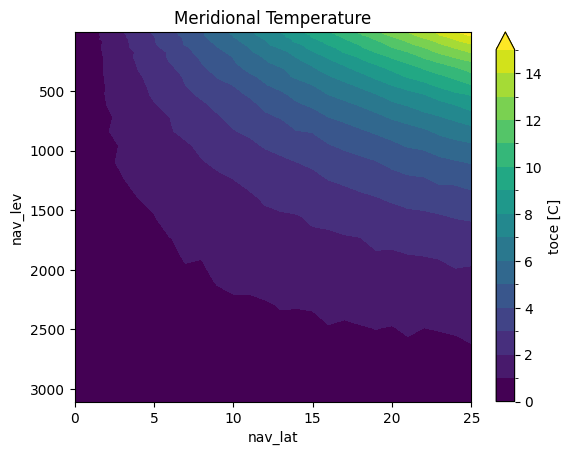

In [2]:
initial_state.ds.toce.isel(nav_lon=1).squeeze().plot.contourf(levels=np.arange(16))
plt.gca().invert_yaxis()
plt.title("Meridional Temperature")

Text(0.5, 1.0, 'Surface Temperature')

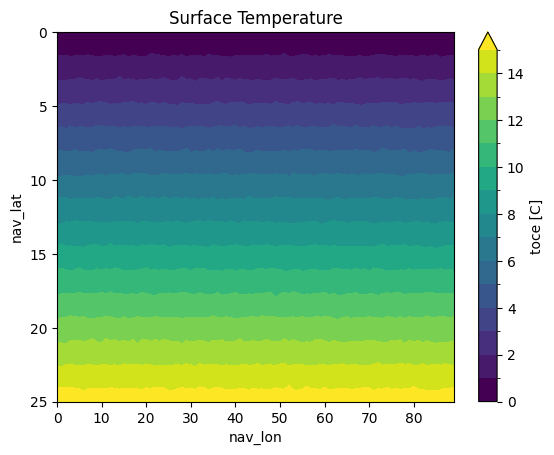

In [3]:
initial_state.ds.toce.isel(nav_lev=0).squeeze().plot.contourf(levels=np.arange(16))
plt.gca().invert_yaxis()
plt.title("Surface Temperature")